<a href="https://colab.research.google.com/github/abinashgochhayat1998/BasicMachineLearningAlgorithms/blob/main/PCAFromScratchOnDermatologyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import all the required packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

##load our data set from computer 
import io
from google.colab import files
uploaded = files.upload()

Saving dermatology.csv to dermatology (1).csv


In [ ]:
dataframe = pd.read_csv(io.BytesIO(uploaded['dermatology.csv']))
dataframe.head() 

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3


In [ ]:
dataframe.isnull().sum()#in our data set we have any missing values so we have to replace missing values with mode age

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
df=dataframe['age'].fillna(dataframe['age'].mode()[0])
dataframe['age']=df
dataframe.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [ ]:
x_independent_variable = dataframe.iloc[:, :-1].values
y_depenedent_variable = dataframe.iloc[:,-1].values
print(x_independent_variable.shape)
print(y_depenedent_variable.shape)

(366, 34)
(366,)


In [ ]:
from sklearn.preprocessing import StandardScaler
x_independent_variable = StandardScaler().fit_transform(x_independent_variable)

###Accuracy of Models before PCA

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_independent_variable,y_depenedent_variable, train_size=0.70, random_state=1) # 70% training and 30% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(256, 34)
(256,)
(110, 34)
(110,)


####Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 94.54545454545455 %


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.99        35
           2       0.89      0.89      0.89        19
           3       1.00      0.96      0.98        23
           4       0.80      0.94      0.86        17
           5       1.00      1.00      1.00        13
           6       1.00      0.67      0.80         3

    accuracy                           0.95       110
   macro avg       0.95      0.91      0.92       110
weighted avg       0.95      0.95      0.95       110



####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.90      1.00      0.95        19
           3       1.00      1.00      1.00        23
           4       1.00      0.88      0.94        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



####Support Vector Machine

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.90      1.00      0.95        19
           3       1.00      1.00      1.00        23
           4       1.00      0.88      0.94        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



####Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.94      1.00      0.97        29
           2       0.90      1.00      0.95        56
           3       1.00      0.71      0.83        21

    accuracy                           0.93       110
   macro avg       0.96      0.80      0.85       110
weighted avg       0.93      0.93      0.92       110



###PCA

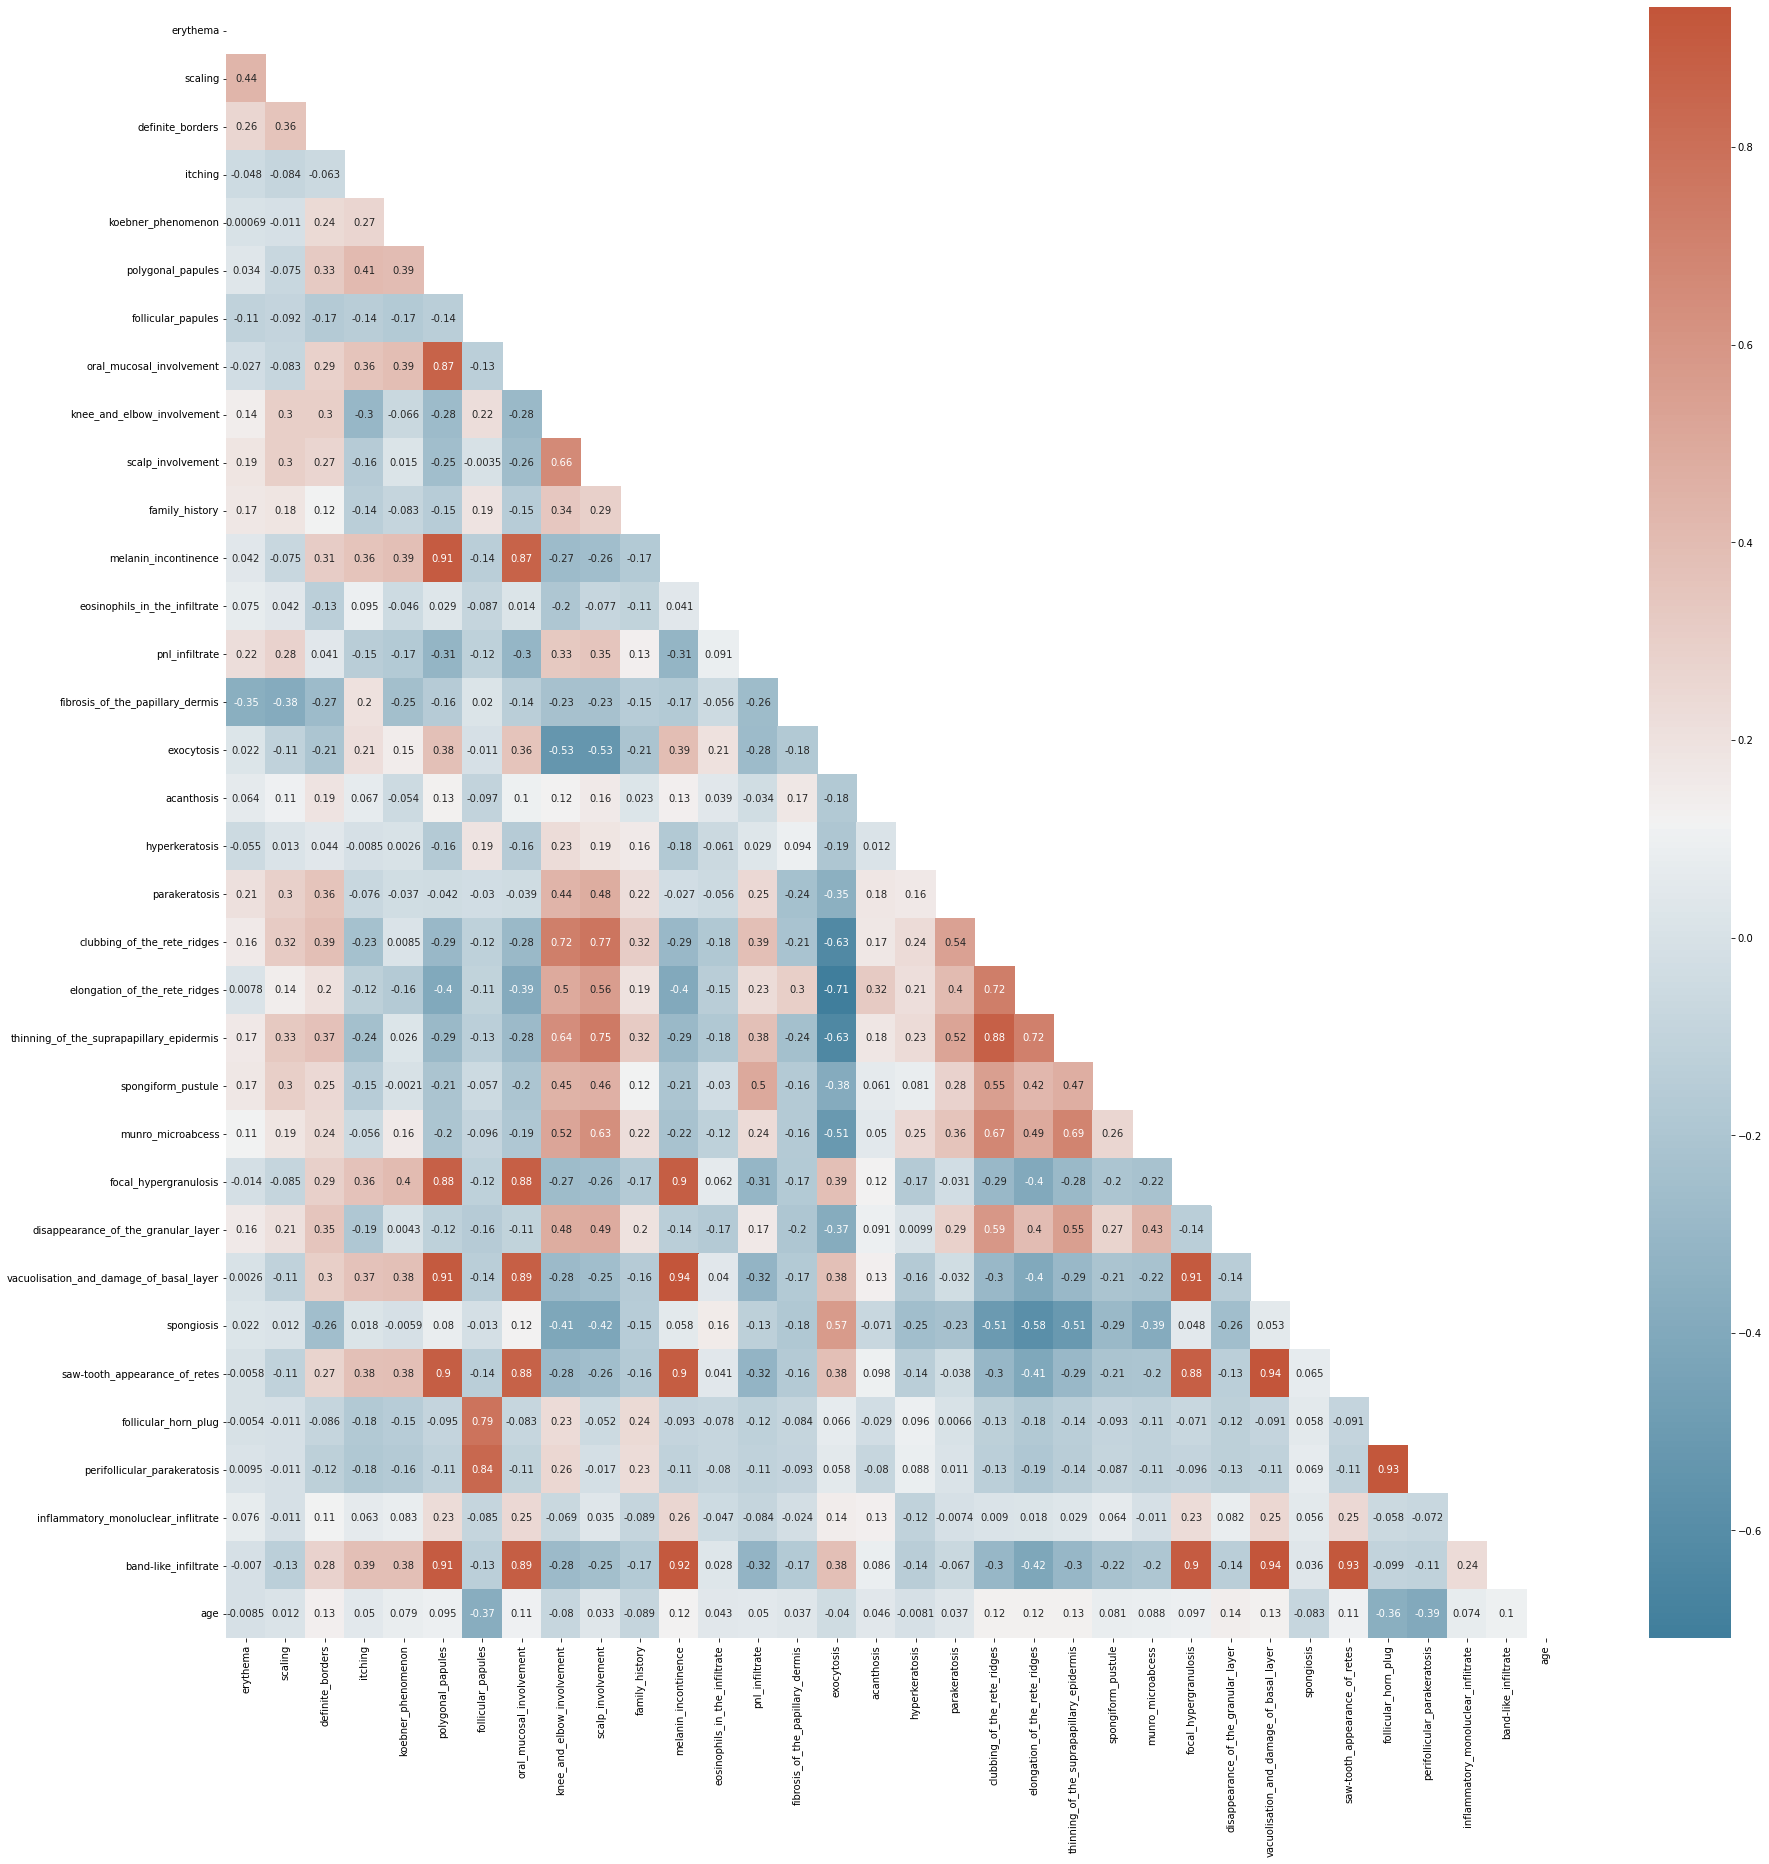

In [ ]:
corr = dataframe.iloc[:,:-1].corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(30, 30))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
##here we are finding covariance matrix
X_covariance_matrix = np.cov(x_independent_variable.T)
X_covariance_matrix.shape

(34, 34)

In [ ]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)


In [ ]:
explained_variances = []
##calculating variance ratio
for i in range(len(eig_vals)):
    explained_variances.append(eig_vals[i] / np.sum(eig_vals))
 
print(np.sum(explained_variances), "\n", explained_variances)
##1st component is enough to explain upto 99% variance in the data & so on

1.0 
 [0.2717562428092672, 0.16118596194046567, 0.09148271472794768, 0.06564819677865982, 0.03942568557875005, 0.035532772921692705, 0.030244458594108622, 0.028263025247594154, 0.025657779266743605, 0.02488780596650264, 0.02365783700923892, 0.021360843455620445, 0.02047448158166032, 0.019537580229434803, 0.01669584543355772, 0.01691251804449212, 0.0146366005888736, 0.01244530106259846, 0.010958284708202582, 0.00974541857979119, 0.00857180115068698, 0.008236719552969967, 0.007297519120359018, 0.006618182771891564, 0.00553997052440745, 0.004021958382641048, 0.0013001896132921792, 0.0016393663073424175, 0.0018266307105877088, 0.0025661765967474933, 0.0032225752353599695, 0.0029656788030315655, 0.002812522592986335, 0.002871354112494001]


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative variance captured as we travel each component \n", cum_var_exp)

Cumulative variance captured as we travel each component 
 [ 27.17562428  43.29422047  52.44249195  59.00731163  62.94988018
  66.50315748  69.52760334  72.35390586  74.91968379  77.40846438
  79.77424808  81.91033243  83.95778059  85.91153861  87.60279042
  89.27237496  90.73603502  91.98056512  93.07639359  94.05093545
  94.90811557  95.73178752  96.46153943  97.12335771  97.67735476
  98.0795506   98.40180813  98.69837601  98.98551142  99.26676368
  99.52338134  99.70604441  99.86998104 100.        ]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
matrix_w = np.hstack((eig_pairs[i][1].reshape(34,1)) for i in range(23)) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [ ]:
matrix_w.shape

(34, 23)

In [ ]:
X = x_independent_variable.dot(matrix_w)
X.shape

(366, 23)

###Accuracy of Models after PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_depenedent_variable, train_size=0.7, random_state=1) # 70% training and 30% test

####Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9454545454545454


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.84      0.84      0.84        19
           3       1.00      1.00      1.00        23
           4       0.82      0.82      0.82        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.95       110
   macro avg       0.94      0.94      0.94       110
weighted avg       0.95      0.95      0.95       110



####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9818181818181818


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.90      1.00      0.95        19
           3       1.00      1.00      1.00        23
           4       1.00      0.88      0.94        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



####Support Vector Machine

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),2)*100,"%")

Accuracy: 98.0 %


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.90      1.00      0.95        19
           3       1.00      1.00      1.00        23
           4       1.00      0.88      0.94        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98       110
   macro avg       0.98      0.98      0.98       110
weighted avg       0.98      0.98      0.98       110



####Random Forest

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 99.0909090909091 %


In [ ]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        23
           4       1.00      0.94      0.97        17
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110

